In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1384


<Axes: xlabel='Time'>

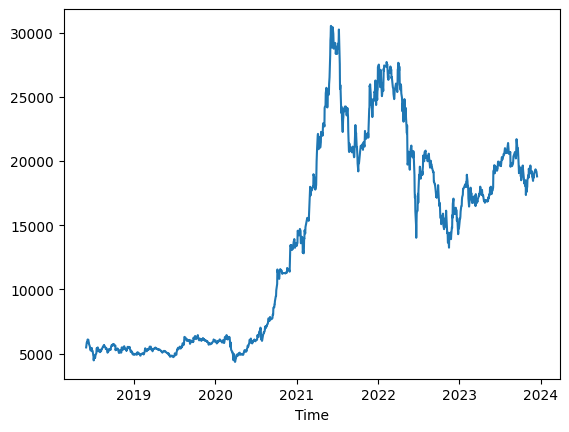

In [2]:
#2. Fetch data and visualize
VIB = stock_historical_data(symbol = "VIB", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB
VIB["Close"].plot()

In [3]:
VIB['Lag'] = np.arange(len(VIB.index))
VIB = VIB[['Close', 'Lag']]
VIB

VIB = pd.DataFrame(VIB)
VIB.set_index("Lag", inplace= True)
VIB

,Close
Lag,
0,5480
1,5880
2,5900
3,5880
4,6060
...,...
1379,19200
1380,19200
1381,19050


In [5]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.6 * len(VIB))
test_size = int(0.6 * len(VIB))

train_data = VIB[:train_size]
test_data = VIB[train_size:]

In [6]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[19374.2202741 ],
       [19397.4709253 ],
       [19420.72157651],
       [19443.97222771],
       [19467.22287892],
       [19490.47353012],
       [19513.72418132],
       [19536.97483253],
       [19560.22548373],
       [19583.47613494],
       [19606.72678614],
       [19629.97743735],
       [19653.22808855],
       [19676.47873975],
       [19699.72939096],
       [19722.98004216],
       [19746.23069337],
       [19769.48134457],
       [19792.73199577],
       [19815.98264698],
       [19839.23329818],
       [19862.48394939],
       [19885.73460059],
       [19908.98525179],
       [19932.235903  ],
       [19955.4865542 ],
       [19978.73720541],
       [20001.98785661],
       [20025.23850781],
       [20048.48915902],
       [20071.73981022],
       [20094.99046143],
       [20118.24111263],
       [20141.49176384],
       [20164.74241504],
       [20187.99306624],
       [20211.24371745],
       [20234.49436865],
       [20257.74501986],
       [20280.99567106],


In [8]:
# 6. 60 days prediction
last_index =  VIB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[32255.08104117]
 [32278.33169238]
 [32301.58234358]
 [32324.83299479]
 [32348.08364599]
 [32371.33429719]
 [32394.5849484 ]
 [32417.8355996 ]
 [32441.08625081]
 [32464.33690201]
 [32487.58755321]
 [32510.83820442]
 [32534.08885562]
 [32557.33950683]
 [32580.59015803]
 [32603.84080923]
 [32627.09146044]
 [32650.34211164]
 [32673.59276285]
 [32696.84341405]
 [32720.09406526]
 [32743.34471646]
 [32766.59536766]
 [32789.84601887]
 [32813.09667007]
 [32836.34732128]
 [32859.59797248]
 [32882.84862368]
 [32906.09927489]
 [32929.34992609]
 [32952.6005773 ]
 [32975.8512285 ]
 [32999.1018797 ]
 [33022.35253091]
 [33045.60318211]
 [33068.85383332]
 [33092.10448452]
 [33115.35513572]
 [33138.60578693]
 [33161.85643813]
 [33185.10708934]
 [33208.35774054]
 [33231.60839175]
 [33254.85904295]
 [33278.10969415]
 [33301.36034536]
 [33324.61099656]
 [33347.86164777]
 [33371.11229897]
 [33394.36295017]
 [33417.61360138]
 [33440.86425258]
 [33464.11490379]

In [9]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 8607.197979080578
Testing MAPE: 42.213741575595485
Testing MAE: 7780.645971962564


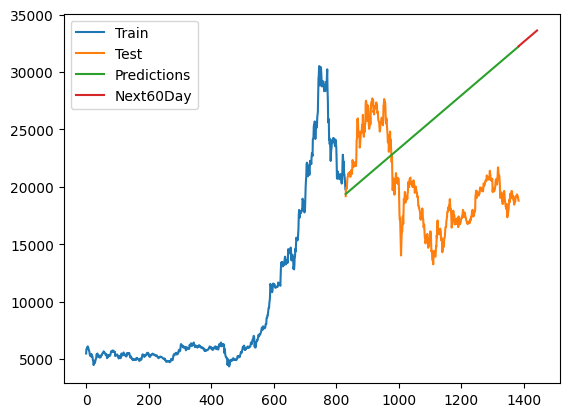

In [10]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()